# Sales analysis
AAL, established in 2000, is a well-known brand in Australia, particularly recognized
for its clothing business. It has opened branches in various states, metropolises, and
tier-1 and tier-2 cities across the country.
The brand caters to all age groups, from kids to the elderly.
Currently experiencing a surge in business, AAL is actively pursuing expansion
opportunities. The
specific tasks include:
1) Identify the states that are generating the highest revenues.
2) Analyze the sales data of the company for the fourth quarter in Australia, examining
it on a state-by-state basis. Provide insights to assist the company in making datadriven decisions for the upcoming year.

## Data wrangling
Ensure that the data is clean and free from any missing or incorrect entries

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Read data
sales_data = pd.read_csv('ausapparalsales4thqrt2020/AusApparalSales4thQrt2020.csv')
sales_data

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500


Ensure that the data is clean and free from any missing or incorrect entries.

In [89]:
# Check for missing values
print(sales_data.isna().sum())

# Check for not-null values
print(sales_data.notna().sum())

# Display data types and non-null counts
print(sales_data.info())

# Drop rows if too many missing values
sales_data = sales_data.dropna(thresh=len(sales_data.columns) - 1)  # drop rows with 2+ missing columns

# Fill missing numerical values with mean
sales_data['Sales'] = sales_data['Sales'].fillna(sales_data['Sales'].mean())

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64
Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB
None


Choose a suitable data wrangling technique—either data standardization or
normalization. Execute the preferred normalization method and present the
resulting data. 

In [92]:
# Normalize Unit and Sales using Min-Max normalization
sales_data['Normalised_Unit'] = (sales_data['Unit'] - sales_data['Unit'].min()) / (sales_data['Unit'].max() - sales_data['Unit'].min())
sales_data['Normalised_Sales'] = (sales_data['Sales'] - sales_data['Sales'].min()) / (sales_data['Sales'].max() - sales_data['Sales'].min())
sales_data

,Date,Time,State,Group,Unit,Sales,Normalised_Unit,Normalised_Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000,0.095238,0.095238
1,1-Oct-2020,Morning,WA,Men,8,20000,0.095238,0.095238
2,1-Oct-2020,Morning,WA,Women,4,10000,0.031746,0.031746
3,1-Oct-2020,Morning,WA,Seniors,15,37500,0.206349,0.206349
4,1-Oct-2020,Afternoon,WA,Kids,3,7500,0.015873,0.015873
...,...,...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000,0.190476,0.190476
7556,30-Dec-2020,Evening,TAS,Kids,15,37500,0.206349,0.206349
7557,30-Dec-2020,Evening,TAS,Men,15,37500,0.206349,0.206349
7558,30-Dec-2020,Evening,TAS,Women,11,27500,0.142857,0.142857


Insights regarding the application of the GroupBy function for
either data chunking or merging, and recommendation based on the
analysis.

In [95]:
# Data Chunking (Summarization / Aggregation)
# Total sales per state
print('Total sales per state')
print(sales_data.groupby('State')['Sales'].sum())
print('\n')
# Average unit per group
print('Average unit per group - Kids/Men/Women/Seniors')
print(sales_data.groupby('Group')['Unit'].mean())
print('\n')
# Sales per state and group
print('Sales per state and group')
print(sales_data.groupby(['State', 'Group'])['Sales'].sum())

# Create a new column: average sales per state
state_avg = sales_data.groupby('State')['Sales'].mean().reset_index()
state_avg.columns = ['State', 'State_Avg_Sales']

# Merge back into the original DataFrame
sales_data = sales_data.merge(state_avg, on='State', how='left')

Total sales per state
State
NSW     74970000
NT      22580000
QLD     33417500
SA      58857500
TAS     22760000
VIC    105565000
WA      22152500
Name: Sales, dtype: int64


Average unit per group - Kids/Men/Women/Seniors
Group
Kids       18.004762
Men        18.148148
Seniors    17.785714
Women      18.083069
Name: Unit, dtype: float64


Sales per state and group
State  Group  
NSW    Kids       18587500
       Men        19022500
       Seniors    18187500
       Women      19172500
NT     Kids        5700000
       Men         5762500
       Seniors     5465000
       Women       5652500
QLD    Kids        8510000
       Men         8392500
       Seniors     8190000
       Women       8325000
SA     Kids       14515000
       Men        14655000
       Seniors    14717500
       Women      14970000
TAS    Kids        5775000
       Men         5757500
       Seniors     5650000
       Women       5577500
VIC    Kids       26360000
       Men        26407500
       Seniors    26315

In [97]:
sales_data

,Date,Time,State,Group,Unit,Sales,Normalised_Unit,Normalised_Sales,State_Avg_Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000,0.095238,0.095238,20511.574074
1,1-Oct-2020,Morning,WA,Men,8,20000,0.095238,0.095238,20511.574074
2,1-Oct-2020,Morning,WA,Women,4,10000,0.031746,0.031746,20511.574074
3,1-Oct-2020,Morning,WA,Seniors,15,37500,0.206349,0.206349,20511.574074
4,1-Oct-2020,Afternoon,WA,Kids,3,7500,0.015873,0.015873,20511.574074
...,...,...,...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000,0.190476,0.190476,21074.074074
7556,30-Dec-2020,Evening,TAS,Kids,15,37500,0.206349,0.206349,21074.074074
7557,30-Dec-2020,Evening,TAS,Men,15,37500,0.206349,0.206349,21074.074074
7558,30-Dec-2020,Evening,TAS,Women,11,27500,0.142857,0.142857,21074.074074


Use groupby() when you need to summarize, analyze, or engineer features at a grouped level.

## Data analysis
1. Perform descriptive statistical analysis on the data in the Sales and Unit
columns. Utilize techniques such as mean, median, mode, and standard
deviation for this analysis.
2. Identify the group with the highest sales and the group with the lowest sales
based on the data provided.
3. Identify the state with the highest and lowest sales based on the data
provided.
4. Generate weekly, monthly, and quarterly reports to document and present
the results of the analysis conducted.

In [101]:
# Descriptive statistical analysis on Sales and Units
columns = ['Sales', 'Unit']
# Descriptive statistics
for col in columns:
    print(f"\nDescriptive Statistics for '{col}':")
    print(f"Mean: {sales_data[col].mean():.2f}")
    print(f"Median: {sales_data[col].median():.2f}")
    print(f"Mode: {sales_data[col].mode().values[0]:.2f}")
    print(f"Standard Deviation: {sales_data[col].std():.2f}")


Descriptive Statistics for 'Sales':
Mean: 45013.56
Median: 35000.00
Mode: 22500.00
Standard Deviation: 32253.51

Descriptive Statistics for 'Unit':
Mean: 18.01
Median: 14.00
Mode: 9.00
Standard Deviation: 12.90


In [103]:
# Identify the group with the highest sales and the group with the lowest sales based on the data provided.
group_sales = sales_data.groupby('Group')['Sales'].sum().reset_index()

# Identify the group with the highest and lowest sales
max_group = group_sales.loc[group_sales['Sales'].idxmax()]
min_group = group_sales.loc[group_sales['Sales'].idxmin()]

print(f"Group with highest total sales: {max_group['Group']} (Sales = {max_group['Sales']})")
print(f"Group with lowest total sales: {min_group['Group']} (Sales = {min_group['Sales']})")

Group with highest total sales:  Men (Sales = 85750000)
Group with lowest total sales:  Seniors (Sales = 84037500)


In [105]:
# Identify the state with the highest and lowest sales based on the data provided.
state_sales = sales_data.groupby('State')['Sales'].sum().reset_index()

# Find the group with the highest sales
max_state = state_sales.loc[state_sales['Sales'].idxmax()]

# Find the group with the lowest sales
min_state = state_sales.loc[state_sales['Sales'].idxmin()]

# Display the results
print(f"State with Highest Sales: {max_state['State']} : Total Sales = {max_group['Sales']}")
print(f"State with Lowest Sales: {min_state['State']} : Total Sales = {min_group['Sales']}")

State with Highest Sales:  VIC : Total Sales = 85750000
State with Lowest Sales:  WA : Total Sales = 84037500


In [107]:
# Generate weekly, monthly, and quarterly reports to document and present the results of the analysis conducted.
# Convert 'Date' column to datetime format
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

# Set 'Date' as index for resampling
sales_data.set_index('Date', inplace=True)

# Ensure 'Sales' and 'Unit' are numeric
sales_data['Sales'] = pd.to_numeric(sales_data['Sales'], errors='coerce')
sales_data['Unit'] = pd.to_numeric(sales_data['Unit'], errors='coerce')

In [111]:
weekly_report = sales_data.resample('W').agg({
    'Sales': ['sum', 'mean', 'std'],
    'Unit': ['sum', 'mean', 'std']
})
print("Weekly Report:\n", weekly_report)

Weekly Report:
                Sales                               Unit                      
                 sum          mean           std    sum       mean        std
Date                                                                         
2020-10-04  15045000  44776.785714  29293.076913   6018  17.910714  11.717231
2020-10-11  27002500  45922.619048  29930.519460  10801  18.369048  11.972208
2020-10-18  26640000  45306.122449  29928.788223  10656  18.122449  11.971515
2020-10-25  26815000  45603.741497  29851.225988  10726  18.241497  11.940490
2020-11-01  21807500  43268.849206  29887.407035   8723  17.307540  11.954963
2020-11-08  20865000  35484.693878  27074.865046   8346  14.193878  10.829946
2020-11-15  21172500  36007.653061  27243.357678   8469  14.403061  10.897343
2020-11-22  21112500  35905.612245  27553.541234   8445  14.362245  11.021416
2020-11-29  21477500  36526.360544  27787.488802   8591  14.610544  11.114996
2020-12-06  29622500  50378.401361  34589.575974

In [115]:
monthly_report = sales_data.resample('M').agg({
    'Sales': ['sum', 'mean', 'std'],
    'Unit': ['sum', 'mean', 'std']
})
print("Monthly Report:\n", monthly_report)

Monthly Report:
                 Sales                               Unit                      
                  sum          mean           std    sum       mean        std
Date                                                                          
2020-10-31  114290000  45353.174603  29861.302213  45716  18.141270  11.944521
2020-11-30   90682500  35985.119048  27366.175823  36273  14.394048  10.946470
2020-12-31  135330000  53702.380952  36385.451298  54132  21.480952  14.554181


C:\Users\lenovo\AppData\Local\Temp\ipykernel_3896\276063889.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_report = sales_data.resample('M').agg({


In [117]:
quarterly_report = sales_data.resample('Q').agg({
    'Sales': ['sum', 'mean', 'std'],
    'Unit': ['sum', 'mean', 'std']
})
print("Quarterly Report:\n", quarterly_report)

Quarterly Report:
                 Sales                                Unit             \
                  sum          mean           std     sum       mean   
Date                                                                   
2020-12-31  340302500  45013.558201  32253.506944  136121  18.005423   

                       
                  std  
Date                   
2020-12-31  12.901403  


C:\Users\lenovo\AppData\Local\Temp\ipykernel_3896\2873793350.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_report = sales_data.resample('Q').agg({


## Data visualisation
Use suitable data visualization libraries to construct a dashboard for the head
of sales and marketing. The dashboard should encompass key parameters:
- State-wise sales analysis for different demographic groups (kids,
women, men, and seniors).
- Group-wise sales analysis (Kids, Women, Men, and Seniors) across
various states.
- Time-of-the-day analysis: Identify peak and off-peak sales periods to
facilitate strategic planning for S&M teams. This information aids in
designing programs like hyper-personalization and Next Best Offers to
enhance sales.

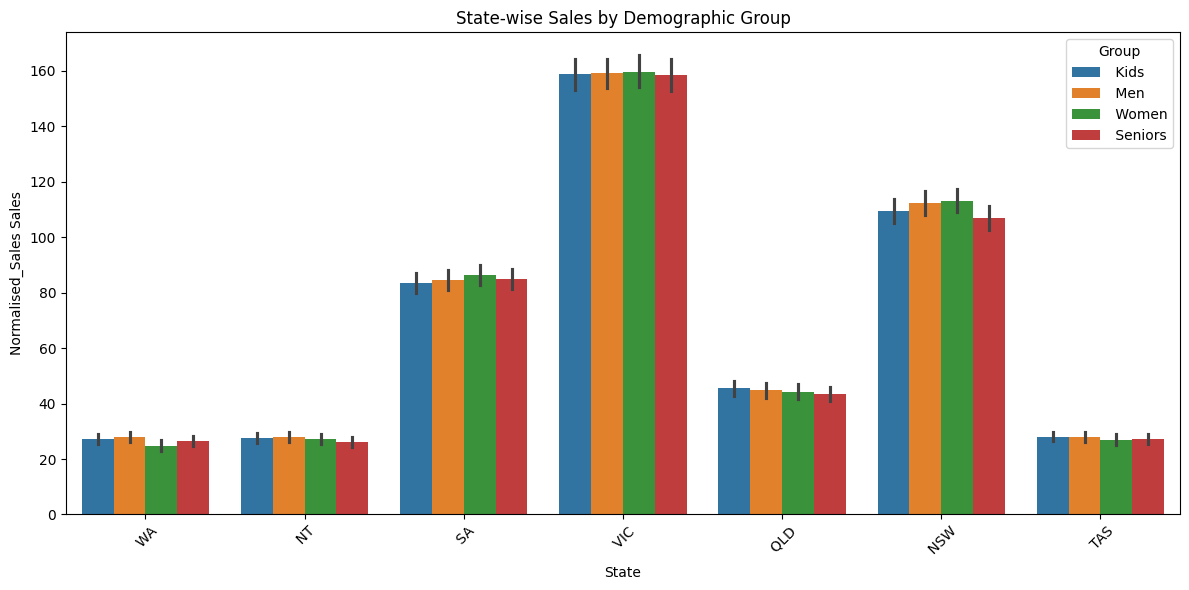

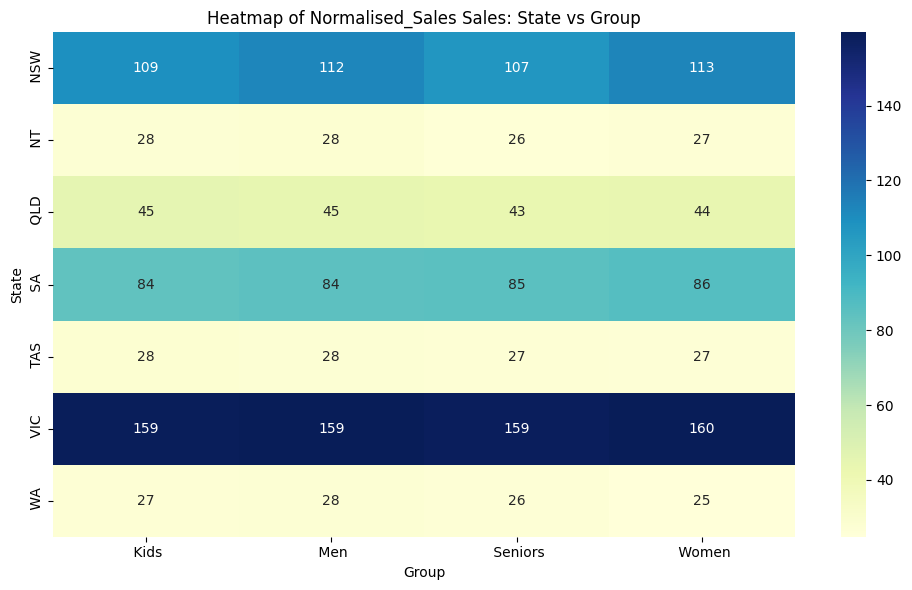

In [144]:
time_order = ['Morning', 'Afternoon', 'Evening']
sales_data['Time_Categorical'] = pd.Categorical(sales_data['Time'], categories=time_order, ordered=True)

# State wise analysis for different demographic groups 
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_data, x='State', y='Normalised_Sales', hue='Group', estimator='sum')
plt.title('State-wise Sales by Demographic Group')
plt.ylabel('Normalised_Sales Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

pivot_table = sales_data.pivot_table(index='State', columns='Group', values='Normalised_Sales', aggfunc='sum', fill_value=0)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Heatmap of Normalised_Sales Sales: State vs Group')
plt.ylabel('State')
plt.xlabel('Group')
plt.tight_layout()
plt.show()

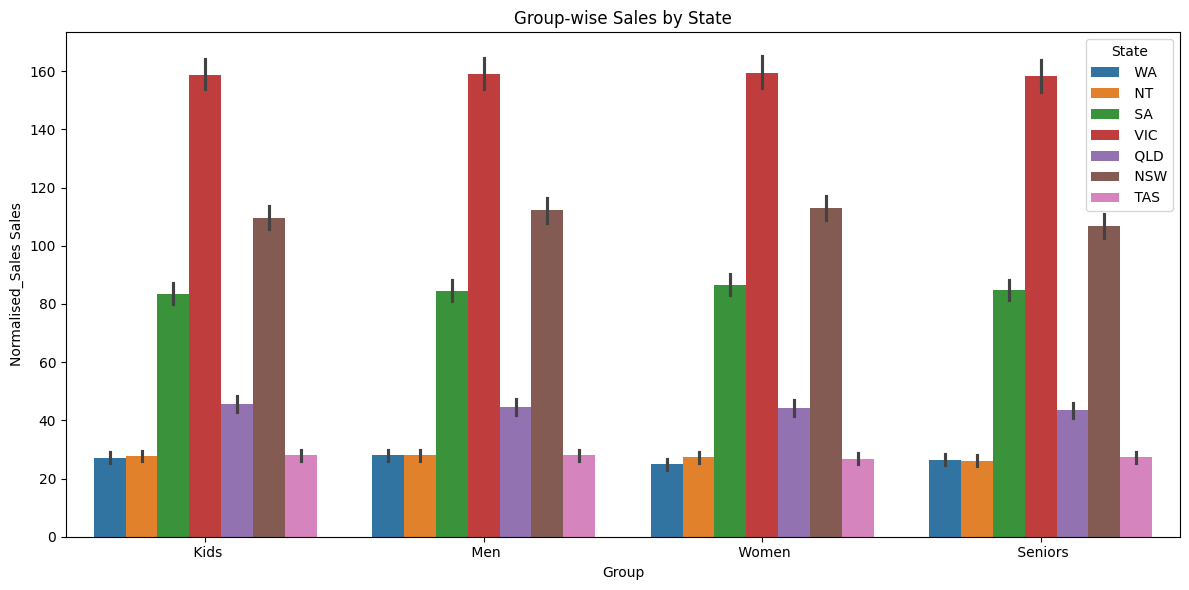

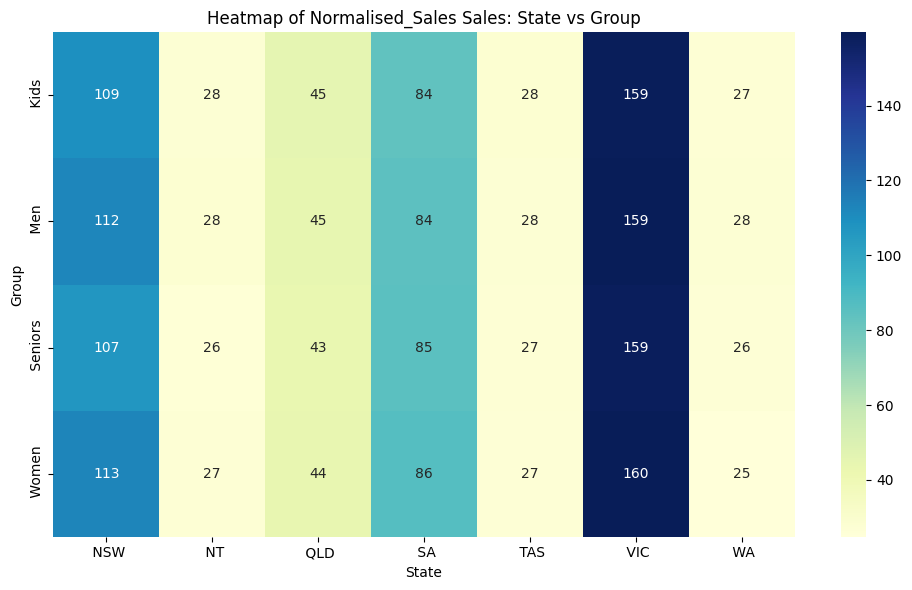

In [145]:
# Group-wise sales analysis (Kids, Women, Men, and Seniors) across various states.
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_data, x='Group', y='Normalised_Sales', hue='State', estimator='sum')
plt.title('Group-wise Sales by State')
plt.ylabel('Normalised_Sales Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

pivot_table = sales_data.pivot_table(index='Group', columns='State', values='Normalised_Sales', aggfunc='sum', fill_value=0)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Heatmap of Normalised_Sales Sales: State vs Group')
plt.ylabel('Group')
plt.xlabel('State')
plt.tight_layout()
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3896\2248217134.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_data, x='Time', y='Normalised_Sales', estimator='sum', palette='viridis')


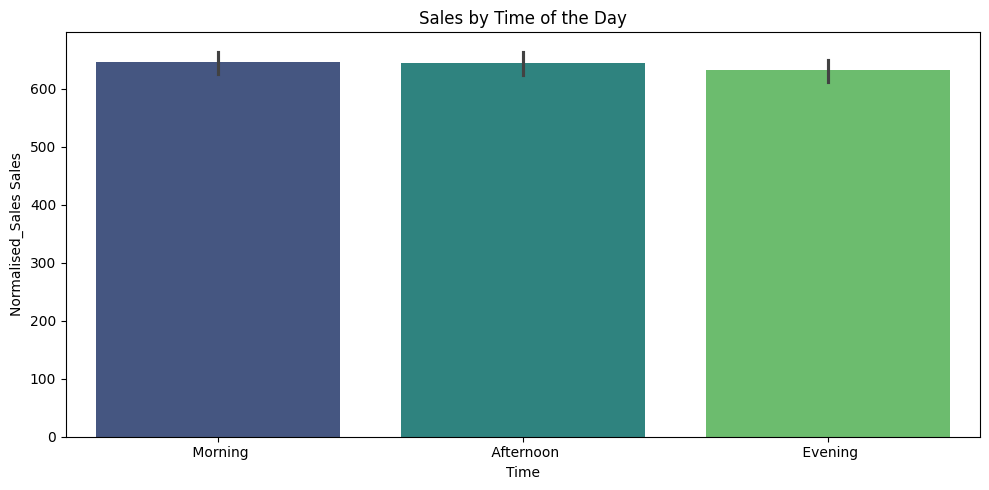

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3896\2248217134.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sales_data, x='Time', y='Normalised_Sales', palette='Set2')


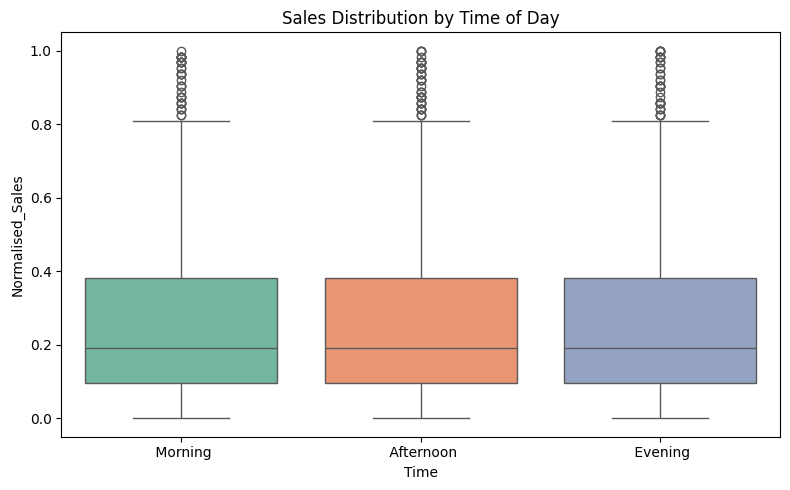

In [147]:
# Time-of-the-day analysis
plt.figure(figsize=(10, 5))
sns.barplot(data=sales_data, x='Time', y='Normalised_Sales', estimator='sum', palette='viridis')
plt.title('Sales by Time of the Day')
plt.ylabel('Normalised_Sales Sales')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=sales_data, x='Time', y='Normalised_Sales', palette='Set2')
plt.title('Sales Distribution by Time of Day')
plt.ylabel('Normalised_Sales')
plt.tight_layout()
plt.show()

In [162]:
stats = sales_data.groupby('Time')['Sales'].agg(['mean', 'std']).reset_index()
stats.columns = ['Time of Day', 'Mean Sales', 'Standard Deviation']
print(stats)

  Time of Day    Mean Sales  Standard Deviation
0   Afternoon  45241.071429        32318.429186
1     Evening  44479.166667        32086.902866
2     Morning  45320.436508        32360.627334


Combined sales data is not providing peak and off peak sales, since the distribution, mean and standard deviation is similar. Hence, statewise and groupwise stratergies have to be planned for increasing the sales

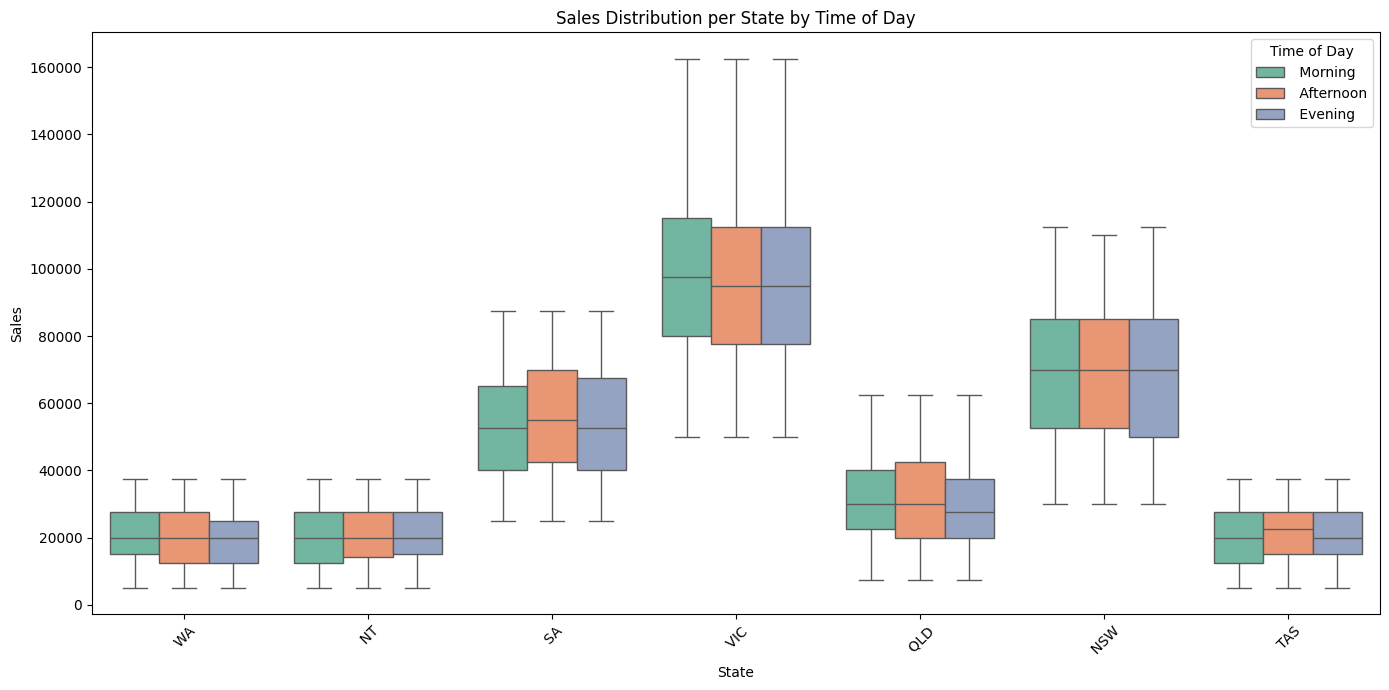

In [165]:
# Statewise peak and off peak sales
plt.figure(figsize=(14, 7))
sns.boxplot(data=sales_data, x='State', y='Sales', hue='Time', palette='Set2')
plt.title('Sales Distribution per State by Time of Day')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Time of Day', loc='upper right')
plt.tight_layout()
plt.show()

- It is observed that sales in WA, NT, NSW aren't affected by the time of the day.
- In SA, sales are more during afternoon.
- In VIC, sales are more during morning.
- In QLD, sales are less during evening.
- In TAS, sales are more during afternoon and least during morning.

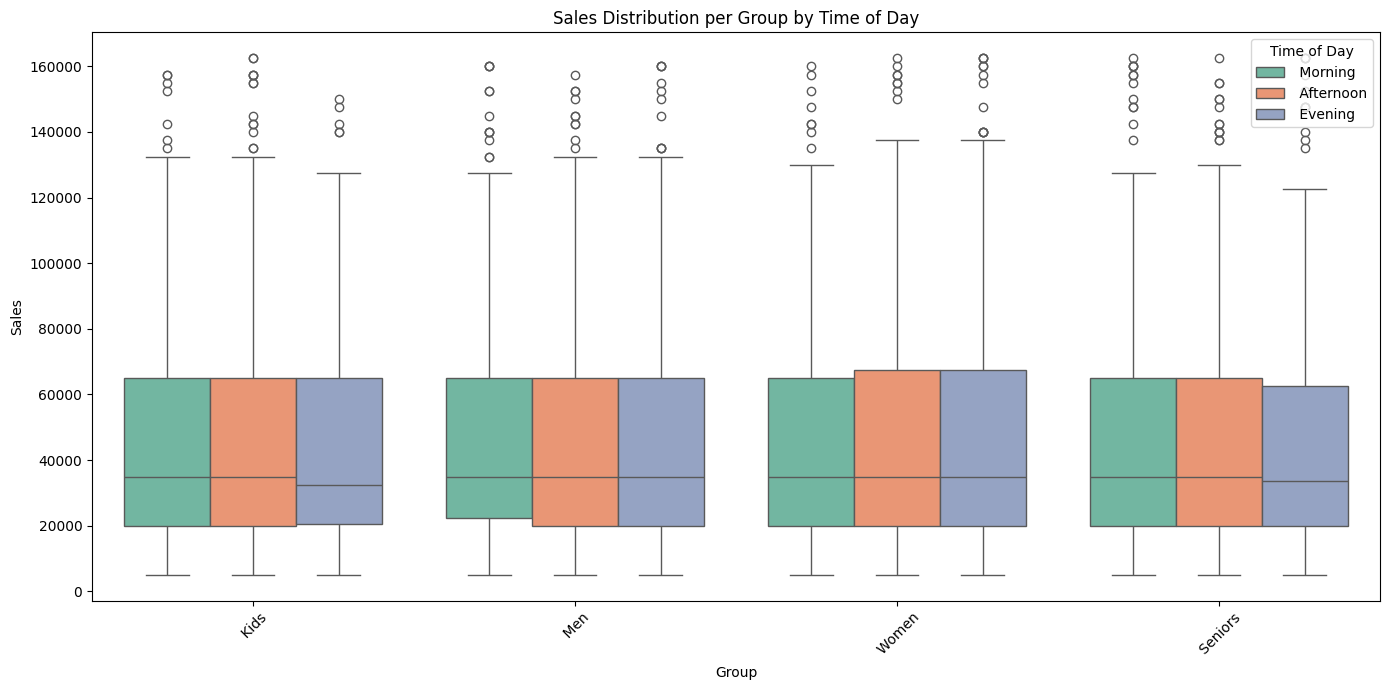

In [176]:
# Groupwise peak and off peak sales
plt.figure(figsize=(14, 7))
sns.boxplot(data=sales_data, x='Group', y='Sales', hue='Time', palette='Set2')
plt.title('Sales Distribution per Group by Time of Day')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Time of Day', loc='upper right')
plt.tight_layout()
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3896\885600499.py:17: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\lenovo\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


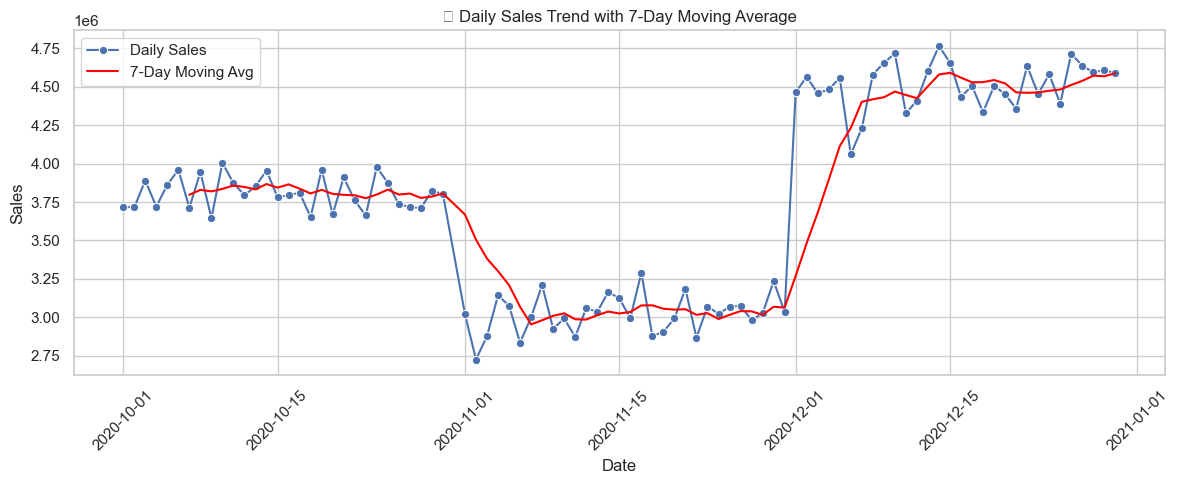

In [200]:
sales_data['Week'] = (sales_data.index.to_period('W')).start_time
sales_data['Month'] = (sales_data.index.to_period('M')).start_time
sales_data['Quarter'] = (sales_data.index.to_period('Q')).start_time
# Daily sales trend
sns.set(style='whitegrid')
daily = sales_data.groupby('Date')['Sales'].sum().reset_index()
daily['7D_MA'] = daily['Sales'].rolling(window=7).mean()


plt.figure(figsize=(12, 5))
sns.lineplot(data=daily, x='Date', y='Sales', label='Daily Sales', marker='o')
sns.lineplot(data=daily, x='Date', y='7D_MA', label='7-Day Moving Avg', color='red')
plt.title('📅 Daily Sales Trend with 7-Day Moving Average')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

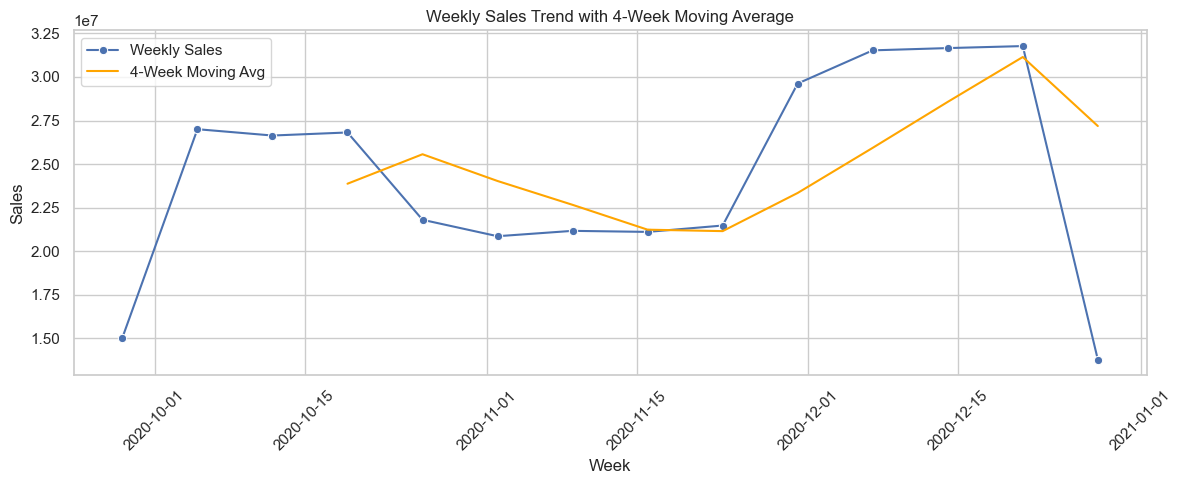

In [204]:
# Weekly sales
weekly = sales_data.groupby('Week')['Sales'].sum().reset_index()
weekly['4W_MA'] = weekly['Sales'].rolling(window=4).mean()

plt.figure(figsize=(12, 5))
sns.lineplot(data=weekly, x='Week', y='Sales', label='Weekly Sales', marker='o')
sns.lineplot(data=weekly, x='Week', y='4W_MA', label='4-Week Moving Avg', color='orange')
plt.title('Weekly Sales Trend with 4-Week Moving Average')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

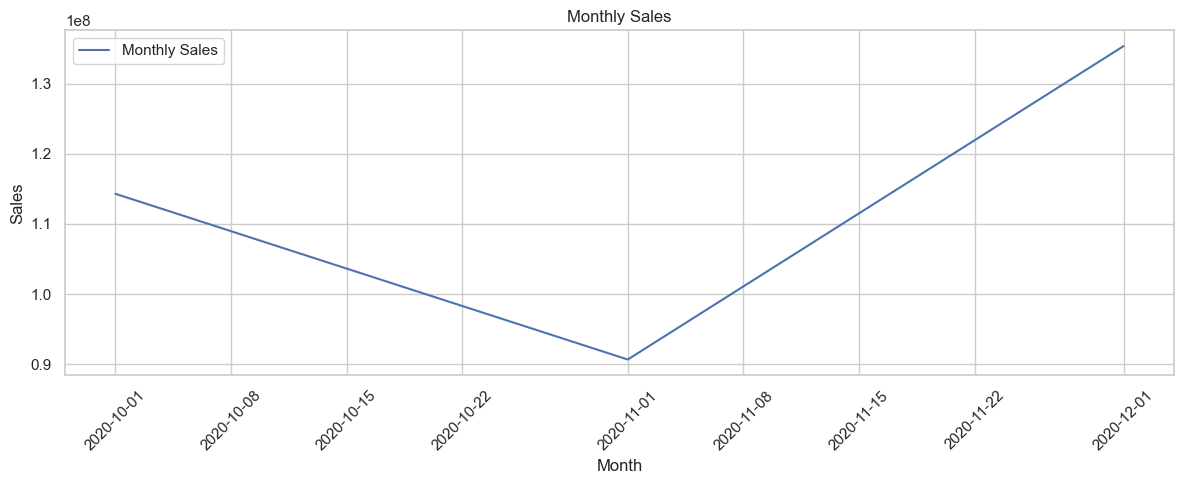

In [226]:
# Monthly sales
monthly = sales_data.groupby('Month')['Sales'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly, x='Month', y='Sales', label='Monthly Sales')
plt.title('Monthly Sales')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

- Seaborn offers default styling that makes plots more readable and presentation-ready without much tweaking.
- Built on top of Matplotlib, it simplifies creation of plots which are valuable for comparing sales trends.
- Works directly with Pandas DataFrames — ideal for filtering by Time, Group, State etc., common in sales analysis.